In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

#### قراءة ملف Excel

In [3]:
df = pd.read_excel(r"C:\Users\huawei\Desktop\myRep.xlsx")
df.head(10)

,#,السنة,رقم الباب,الباب,رقم البند,وصف البند,البند الرئيسي,رقم البند الرئيسي,رمز البند,نوع البند,تسلسل البند,مبلغ البند الأساسي,مبلغ البند,المبلغ الحالي للبند,المبلغ المتوفر,المركز المالي,مبلغ البند الأساسي - الفعلي
0,14,2024,21,تعويضات العاملين (الباب الاول),27,مخصص مكافآت ادارة الكلية الجامعية بتيماء*,مكافآت الموظفين المدنيين,6,200017,مخصص,1017,0.0,17423.735,0.000,0.000,119,17423.735
1,21,2024,31,الاصول غير الماليه,4,اسكان أعضاء هيئة التدريس والطلاب,NaN,0,400080000,بند,4,0.0,0.000,0.000,0.000,1,0.000
2,22,2024,21,تعويضات العاملين (الباب الاول),36,مخصص مكافآت ادارة عمادة خدمة المجتمع والتعليم ...,مكافآت الموظفين المدنيين,6,200026,مخصص,1026,0.0,0.000,0.000,0.000,91,0.000
3,31,2024,21,تعويضات العاملين (الباب الاول),53,مخصص مكافآت الإدارة العامة للشؤون الهندسية,مكافآت الموظفين المدنيين,6,200043,مخصص,1043,0.0,143615.065,0.000,0.000,82,143615.065
4,32,2024,21,تعويضات العاملين (الباب الاول),144,مخصص خارج الدوام مركز اللغة الإنجليزية,مكافآت الموظفين المدنيين,6,200134,مخصص,1128,0.0,11485.135,0.000,0.000,135,11485.135
5,33,2024,21,تعويضات العاملين (الباب الاول),44,مخصص مكافآت ادارة كلية العلوم الطبية التطبيقية*,مكافآت الموظفين المدنيين,6,200034,مخصص,1034,0.0,30462.190,0.000,0.000,108,30462.190
6,34,2024,21,تعويضات العاملين (الباب الاول),10,مكافأة نهاية الخدمة للعمال,NaN,0,212213,بند,10,50000.0,209973.000,0.460,0.460,1,209972.540
7,35,2024,22,السلع والخدمات,2,استهلاك المياه,NaN,0,2211211,بند,2,650000.0,867566.000,73540.640,73540.640,1,794025.360
8,36,2024,22,السلع والخدمات,12,مخصصات الابتعاث,NaN,0,221311,بند,12,31911500.0,895865.500,278316.135,278316.135,1,617549.365
9,37,2024,22,السلع والخدمات,16,حفلات وضيافات,NaN,0,22132,بند,16,1000000.0,1718847.000,0.040,0.040,1,1718846.960


#### إعادة تسمية الأعمدة

In [7]:
column_mapping = {
    "رقم الباب": "Section",
    "رقم البند": "SubSection",
    "مبلغ البند الأساسي": "Expected",
    "مبلغ البند": "Requested",
    "المبلغ الحالي للبند": "Remaining",
    "مبلغ البند الأساسي - الفعلي": "Actual",
    
    "#": "ID",
    "السنة": "Year",
    "الباب": "Category",
    "وصف البند": "Description",
    "البند الرئيسي": "MainItem",
    "رقم البند الرئيسي": "MainItemNumber",
    "رمز البند": "ItemCode",
    "نوع البند": "ItemType",
    "تسلسل البند": "ItemSequence",
    "المبلغ المتوفر": "AvailableAmount",
    "المركز المالي": "FinancialCenter"
}
df.rename(columns=column_mapping, inplace=True)
df.head(10)


,ID,Year,Section,Category,SubSection,Description,MainItem,MainItemNumber,ItemCode,ItemType,ItemSequence,Expected,Requested,Remaining,AvailableAmount,FinancialCenter,Actual
0,14,2024,21,تعويضات العاملين (الباب الاول),27,مخصص مكافآت ادارة الكلية الجامعية بتيماء*,مكافآت الموظفين المدنيين,6,200017,مخصص,1017,0.0,17423.735,0.000,0.000,119,17423.735
1,21,2024,31,الاصول غير الماليه,4,اسكان أعضاء هيئة التدريس والطلاب,NaN,0,400080000,بند,4,0.0,0.000,0.000,0.000,1,0.000
2,22,2024,21,تعويضات العاملين (الباب الاول),36,مخصص مكافآت ادارة عمادة خدمة المجتمع والتعليم ...,مكافآت الموظفين المدنيين,6,200026,مخصص,1026,0.0,0.000,0.000,0.000,91,0.000
3,31,2024,21,تعويضات العاملين (الباب الاول),53,مخصص مكافآت الإدارة العامة للشؤون الهندسية,مكافآت الموظفين المدنيين,6,200043,مخصص,1043,0.0,143615.065,0.000,0.000,82,143615.065
4,32,2024,21,تعويضات العاملين (الباب الاول),144,مخصص خارج الدوام مركز اللغة الإنجليزية,مكافآت الموظفين المدنيين,6,200134,مخصص,1128,0.0,11485.135,0.000,0.000,135,11485.135
5,33,2024,21,تعويضات العاملين (الباب الاول),44,مخصص مكافآت ادارة كلية العلوم الطبية التطبيقية*,مكافآت الموظفين المدنيين,6,200034,مخصص,1034,0.0,30462.190,0.000,0.000,108,30462.190
6,34,2024,21,تعويضات العاملين (الباب الاول),10,مكافأة نهاية الخدمة للعمال,NaN,0,212213,بند,10,50000.0,209973.000,0.460,0.460,1,209972.540
7,35,2024,22,السلع والخدمات,2,استهلاك المياه,NaN,0,2211211,بند,2,650000.0,867566.000,73540.640,73540.640,1,794025.360
8,36,2024,22,السلع والخدمات,12,مخصصات الابتعاث,NaN,0,221311,بند,12,31911500.0,895865.500,278316.135,278316.135,1,617549.365
9,37,2024,22,السلع والخدمات,16,حفلات وضيافات,NaN,0,22132,بند,16,1000000.0,1718847.000,0.040,0.040,1,1718846.960


### Data Visualization

#### عدد الأبواب ( موضحه بارقامها ) وكل باب كم بند فيه
- باستخدام Bar Chart

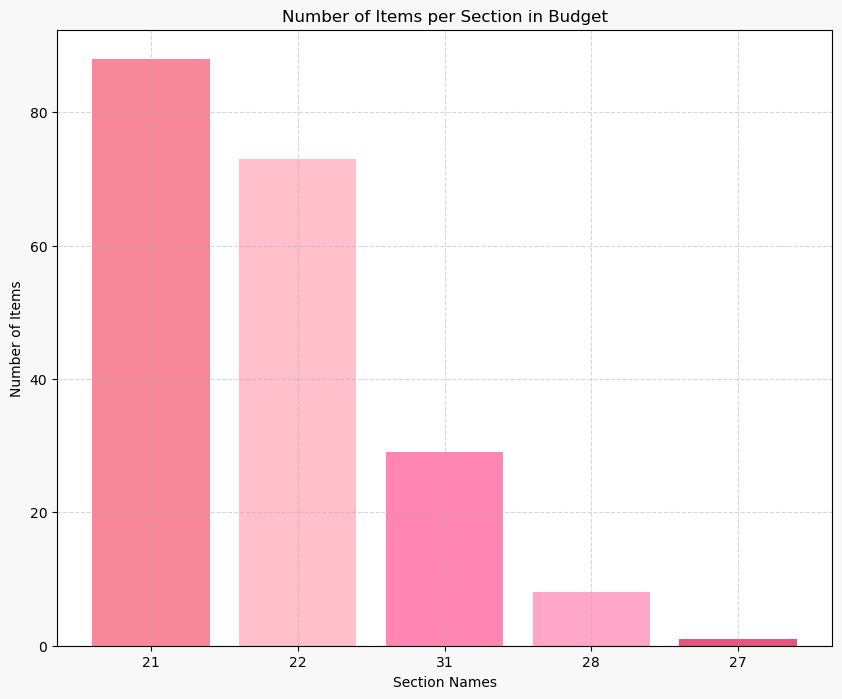

In [11]:
section_counts = df["Section"].value_counts()
colors = ['#F7879A', 'pink', '#FF85B2', '#FFA6C9', '#E75480', '#FFD1DC']
plt.figure(figsize=(10, 8), facecolor='#F8F8F8')
plt.bar(section_counts.index.astype(str), section_counts.values, color=colors[:len(section_counts)])
plt.xlabel("Section Names")
plt.ylabel("Number of Items")
plt.title("Number of Items per Section in Budget")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


#### حساب إجمالي المبالغ الفعلية لكل باب
- باستخدام Bar Chart

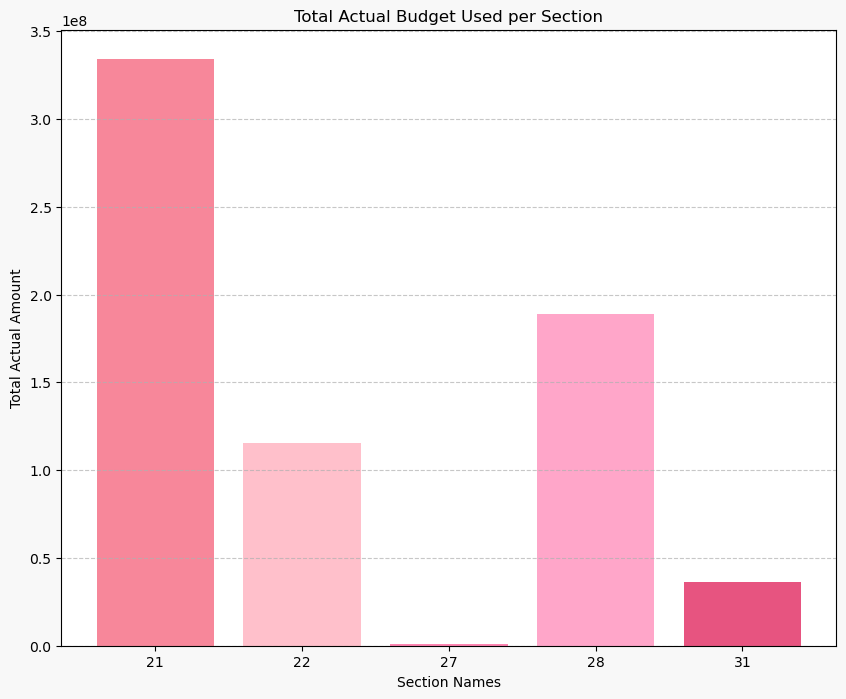

In [14]:
section_actual_sums = df.groupby("Section")["Actual"].sum()
colors = ['#F7879A', 'pink', '#FF85B2', '#FFA6C9', '#E75480', '#FFD1DC']
plt.figure(figsize=(10, 8), facecolor='#F8F8F8')
plt.bar(section_actual_sums.index.astype(str), section_actual_sums.values,color=colors[:len(section_actual_sums)])
plt.xlabel("Section Names")
plt.ylabel("Total Actual Amount")
plt.title("Total Actual Budget Used per Section")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### نسبة توزيع المزيانية على الابواب
- باستخدام Pie Chart

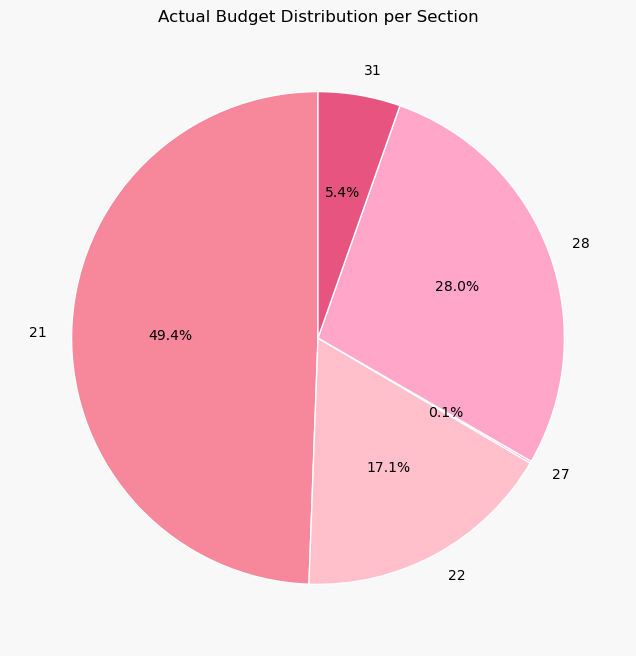

In [17]:
actual_usage = df.groupby("Section")["Actual"].sum()
colors = ['#F7879A', 'pink', '#FF85B2', '#FFA6C9', '#E75480', '#FFD1DC']
plt.figure(figsize=(10, 8), facecolor='#F8F8F8')
plt.pie(actual_usage.values, labels=actual_usage.index.astype(str), colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title("Actual Budget Distribution per Section")
plt.show()

#### فارق الاحتياج للمبالغ الفعليه للابواب جميعاً
- باستخدام Line Chart

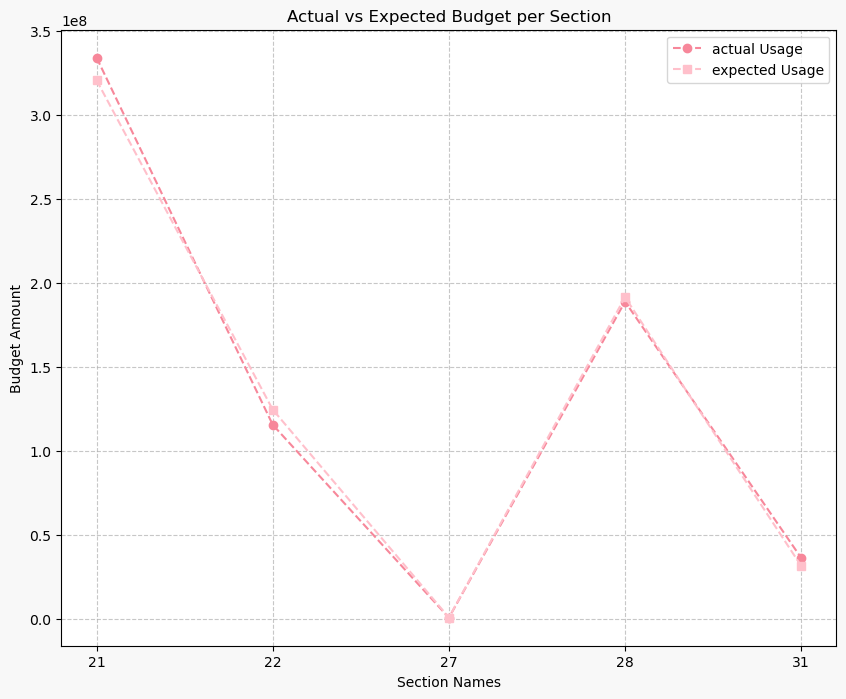

In [20]:
actual_usage = df.groupby("Section")["Actual"].sum()
expected_usage = df.groupby("Section")["Expected"].sum()
plt.figure(figsize=(10, 8), facecolor='#F8F8F8')
plt.plot(actual_usage.index.astype(str), actual_usage.values, marker='o', linestyle='--', color='#F7879A', label="actual Usage")
plt.plot(expected_usage.index.astype(str), expected_usage.values, marker='s', linestyle='--', color='pink', label="expected Usage")
plt.xlabel("Section Names")
plt.ylabel("Budget Amount")
plt.title("Actual vs Expected Budget per Section")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

#### كل باب كم نسبة المبلغ الفعلي ( مبلغ الحالي – مبلغ البند )
- باستخدام Pie Chart

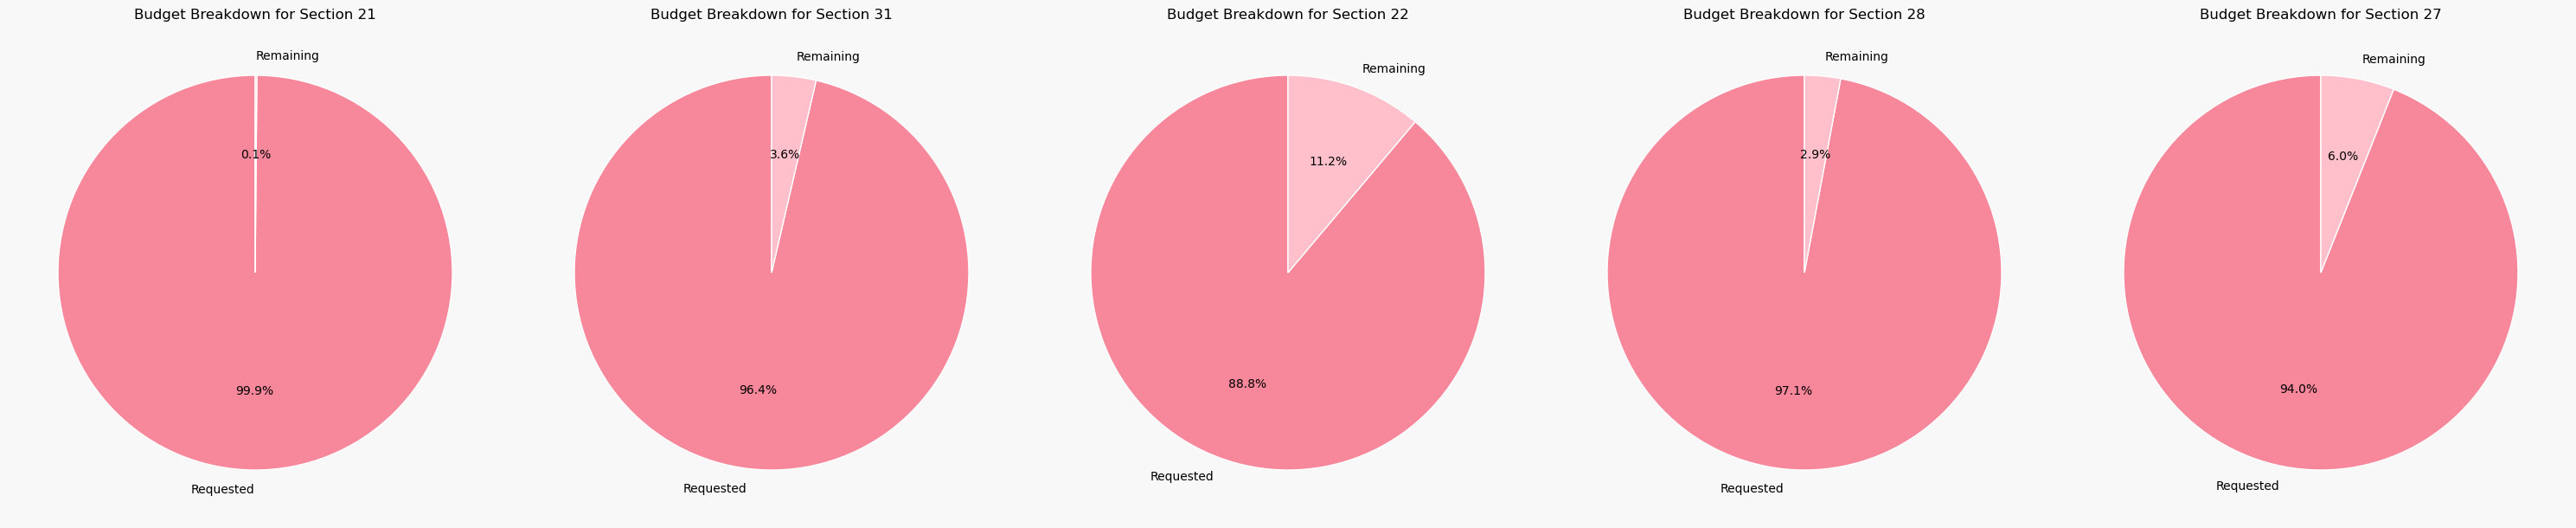

In [23]:
sections = df["Section"].unique()
num_sections = len(sections)
fig, axes = plt.subplots(nrows=1, ncols=num_sections, figsize=(6 * num_sections, 6), facecolor='#F8F8F8')

if num_sections == 1:
    axes = [axes]  # Ensure axes is iterable when there's only one section

for ax, section in zip(axes, sections):
    section_data = df[df["Section"] == section]
    requested_sum = section_data["Requested"].sum()
    remaining_sum = section_data["Remaining"].sum()

    values = [requested_sum, remaining_sum]
    labels = ["Requested", "Remaining"]

    ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=["#F7879A", "#FFC0CB"],  wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
    ax.set_title(f"Budget Breakdown for Section {section}")
plt.tight_layout()
plt.show()


#### حساب النسبة المئوية لاستخدام الميزانية في كل فئة فرعية داخل كل قسم

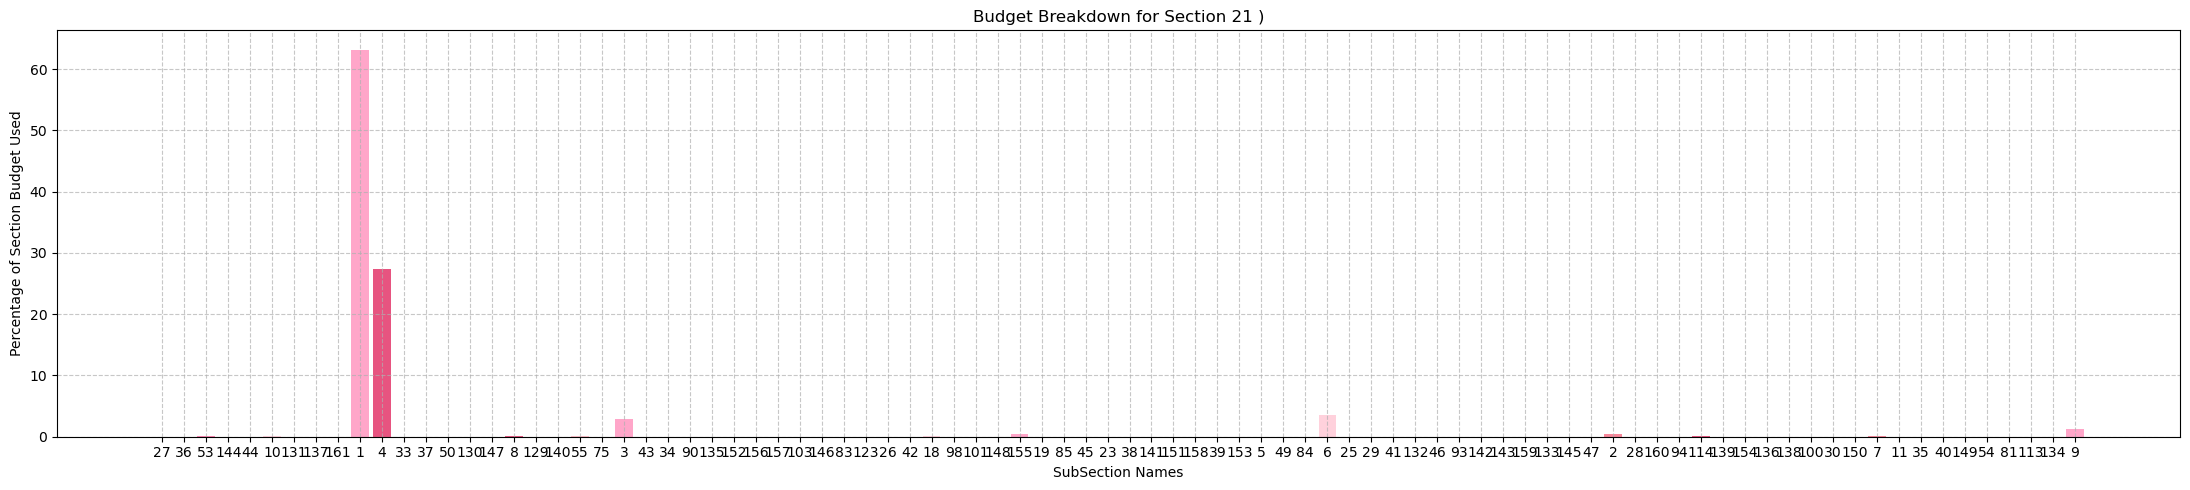

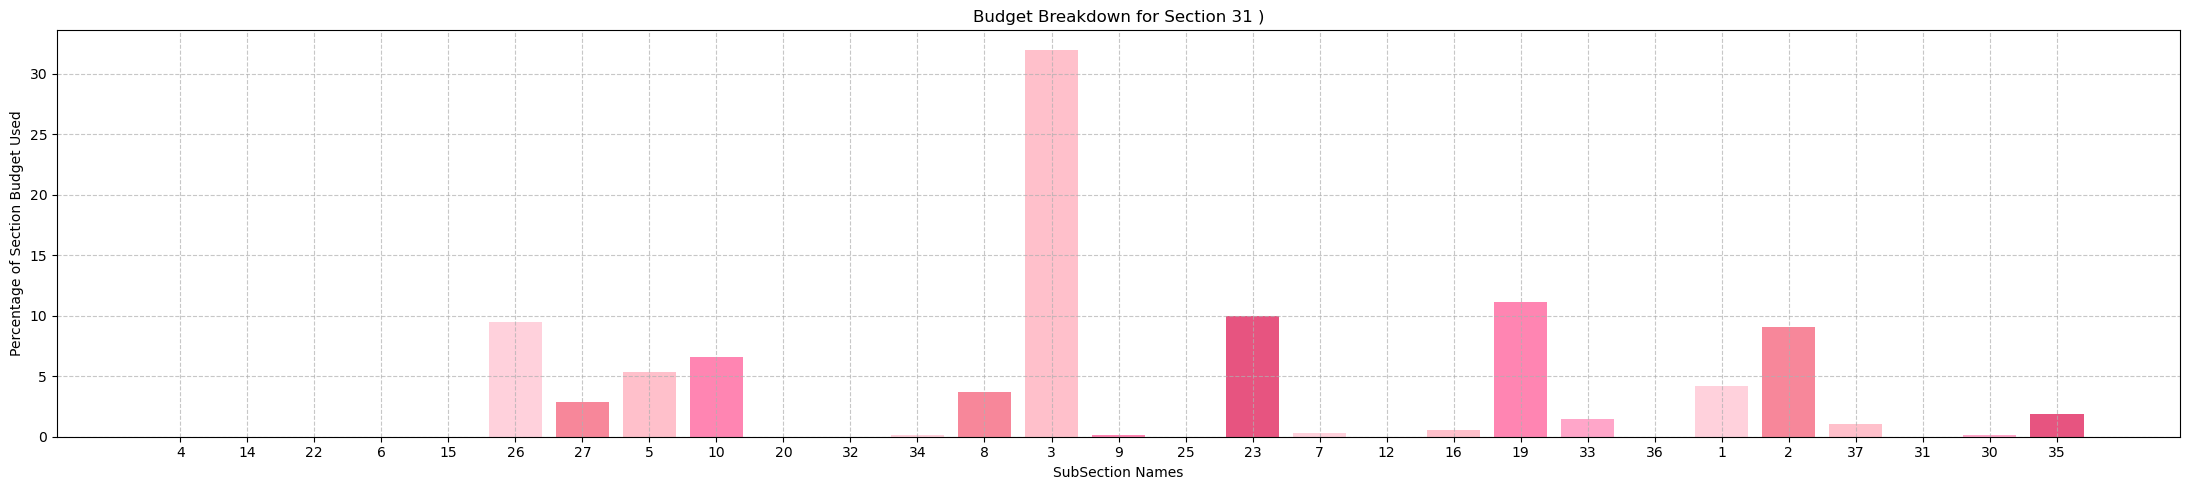

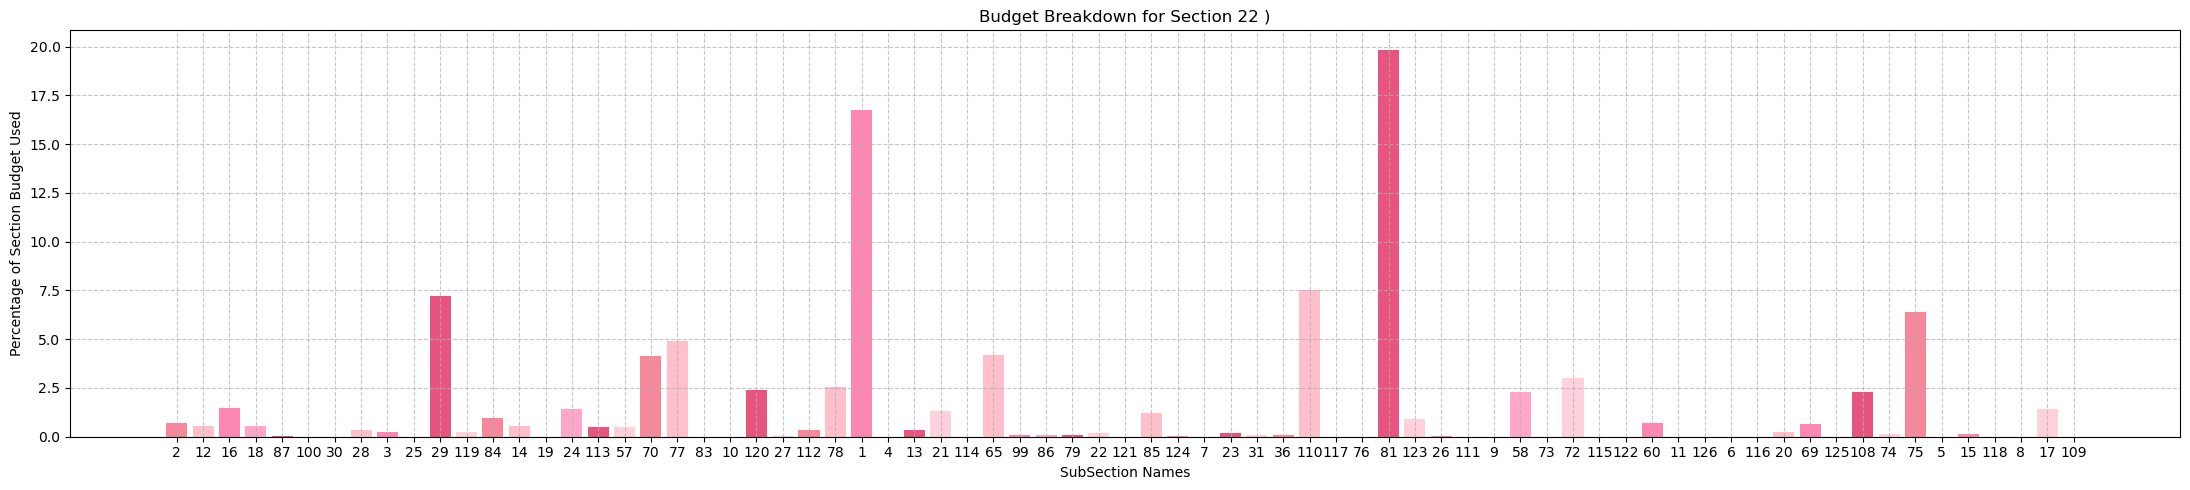

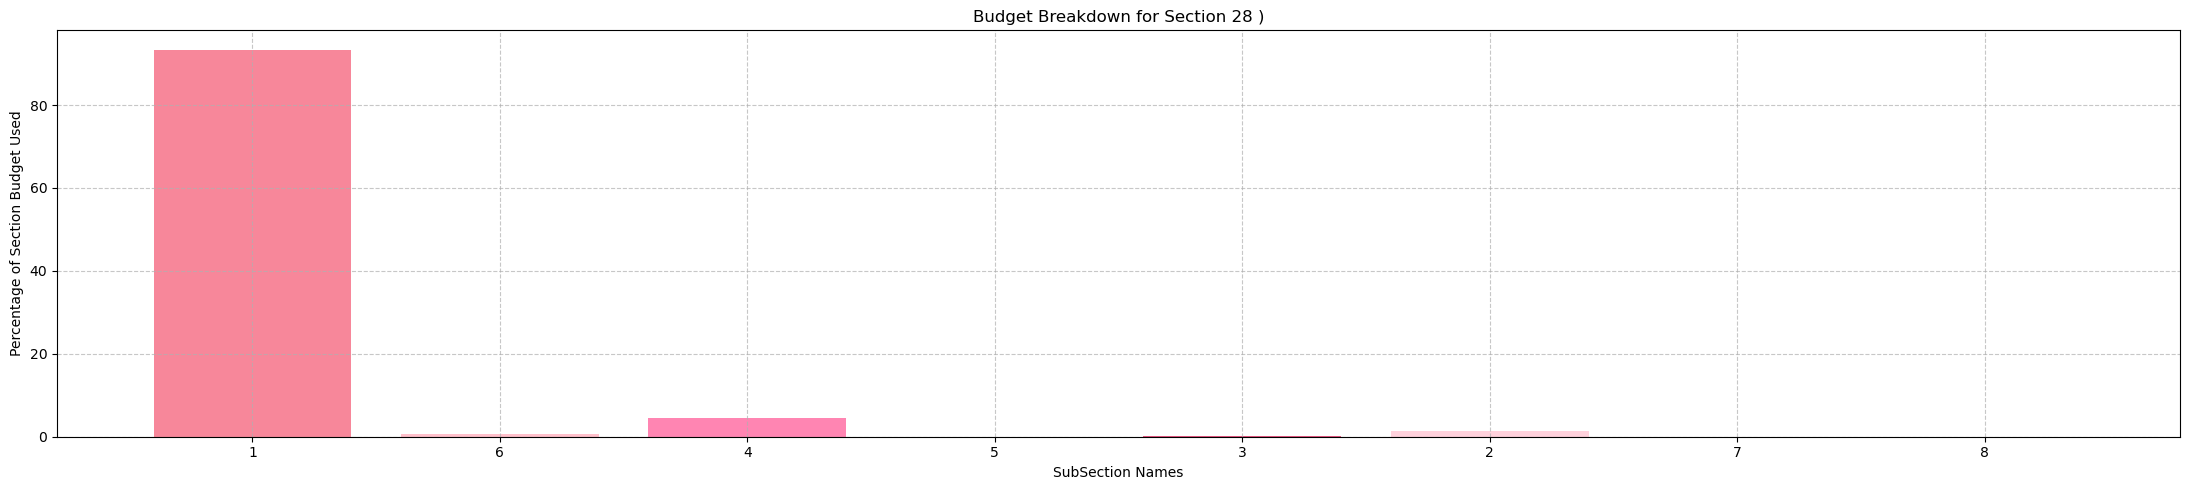

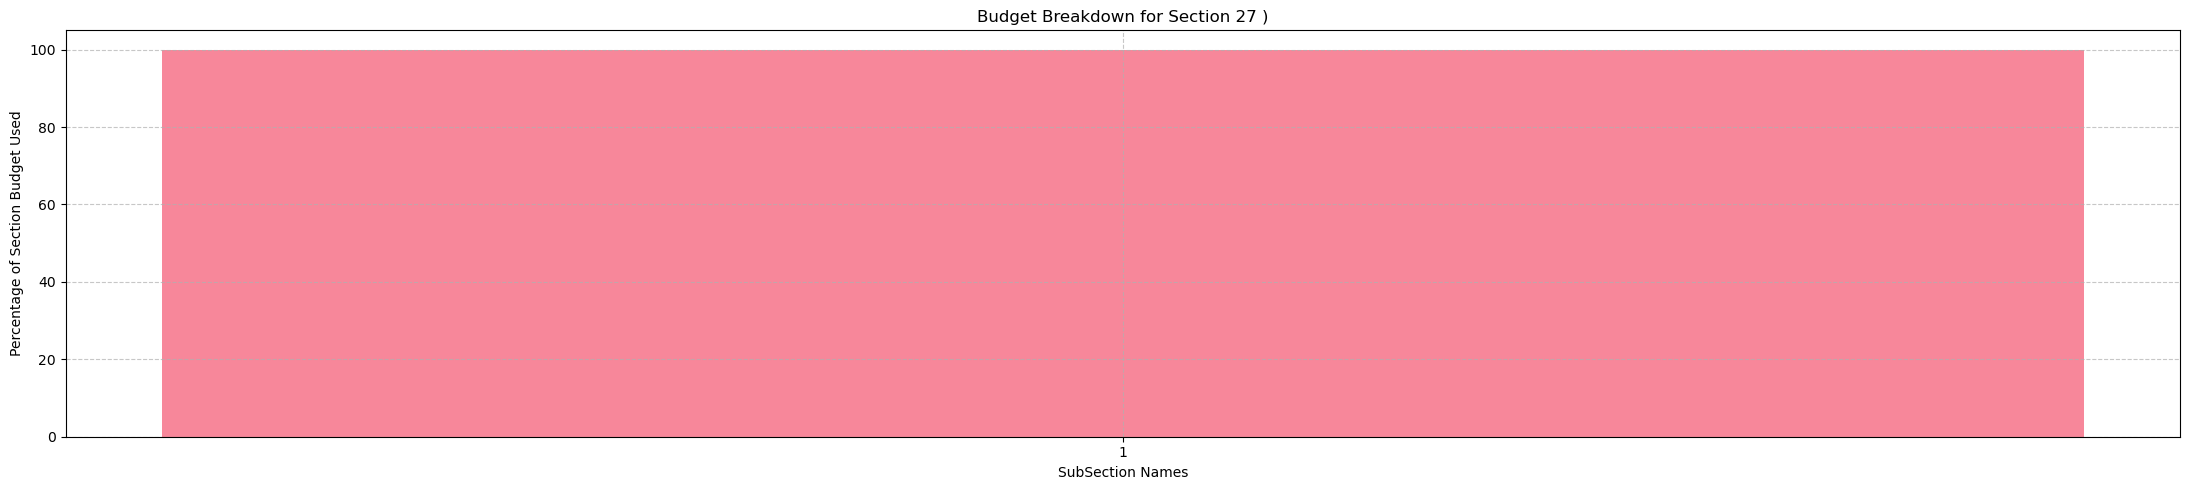

In [26]:
section_budget = df.groupby("Section")["Actual"].sum()

df["SubSection_Percentage"] = df["Actual"] / df.groupby("Section")["Actual"].transform("sum") * 100

sections = df["Section"].unique()

colors = ['#F7879A', 'pink', '#FF85B2', '#FFA6C9', '#E75480', '#FFD1DC']

for section in sections:
    section_data = df[df["Section"] == section]

    plt.figure(figsize=(22, 5))
    
    color_count = len(section_data)
    section_colors = colors[:color_count]  
    
    plt.bar(section_data["SubSection"].astype(str), section_data["SubSection_Percentage"], color=section_colors)
    
    plt.xlabel("SubSection Names")
    plt.ylabel("Percentage of Section Budget Used")
    plt.title(f"Budget Breakdown for Section {section} )")
    plt.grid(True, linestyle="--", alpha=0.7)

    plt.tight_layout()
    plt.show()


#### تحليل التكرارات في جميع الصفوف
-   باستخدام Histogram

Most frequent row count:
1


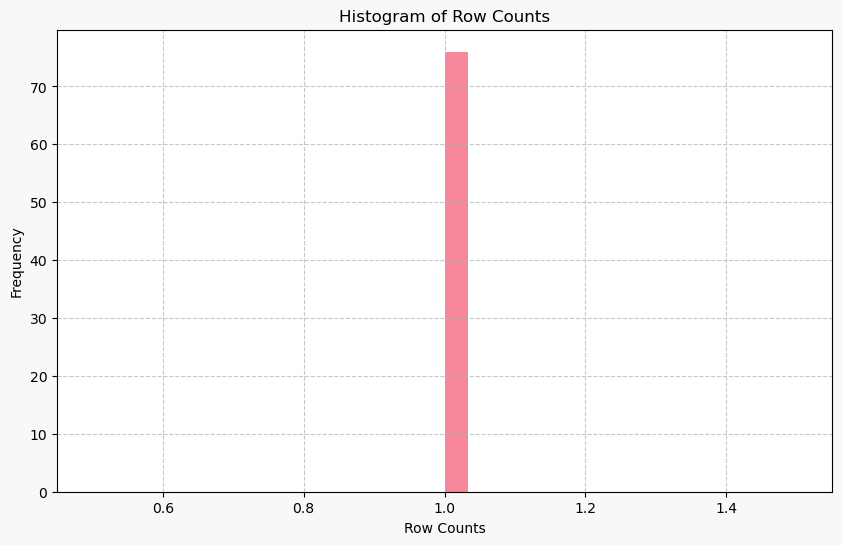

In [28]:
row_counts = df.value_counts()  
print("Most frequent row count:")
print(row_counts.max())  # طباعة عدد مرات التكرار الأكثر شيوعًا

plt.figure(figsize=(10, 6), facecolor='#F8F8F8')
row_counts.plot(kind="hist", bins=30, color='#F7879A')  
plt.title("Histogram of Row Counts")
plt.xlabel("Row Counts")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

#### تحويل القيم الفارغة الى NAN

In [32]:
#Data Cleaning
df.replace("", np.nan, inplace=True)

#### حساب القيم المفقودة لكل عامود باستخدام مخطط Heatmap

Missing Values per Column:
MainItem    123
dtype: int64


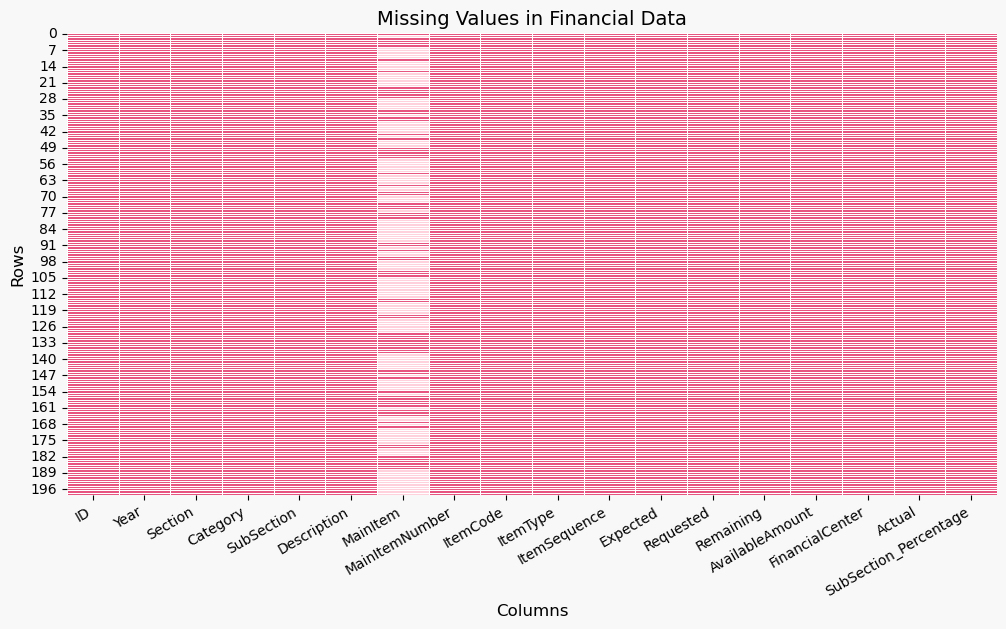

In [35]:
nan_counts = df.isna().sum()

print("Missing Values per Column:")
print(nan_counts[nan_counts > 0])  # يعرض فقط الأعمدة التي تحتوي على قيم مفقودة

fig, ax = plt.subplots(figsize=(12, 6), facecolor='#F8F8F8')
cmap = sns.color_palette([ '#E75480', '#FFD1DC'], as_cmap=True)

sns.heatmap(df.isna(), cmap=cmap, cbar=False, linewidths=0.5, ax=ax)
ax.set_title("Missing Values in Financial Data", fontsize=14)
ax.set_xlabel("Columns", fontsize=12)
ax.set_ylabel("Rows", fontsize=12)
ax.set_xticklabels(df.columns, rotation=30, ha="right")
plt.show()


#### معرفة القيم المتطرفة باستخدام Box Plot

C:\Users\huawei\AppData\Local\Temp\ipykernel_20780\3357591834.py:3: UserWarning: 
The palette list has fewer values (1) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df.select_dtypes(include=['number']), palette=["#F7879A"])


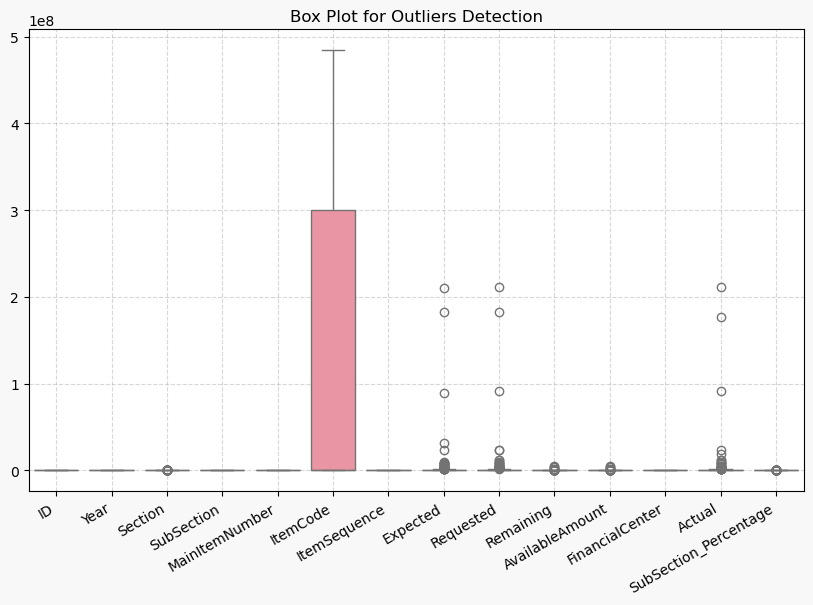

In [38]:
plt.figure(figsize=(10, 6), facecolor='#F8F8F8')

sns.boxplot(data=df.select_dtypes(include=['number']), palette=["#F7879A"])
plt.title("Box Plot for Outliers Detection")
plt.xticks( rotation=30, ha="right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### Data Cleening

In [41]:
df = df.drop_duplicates()
df

,ID,Year,Section,Category,SubSection,Description,MainItem,MainItemNumber,ItemCode,ItemType,ItemSequence,Expected,Requested,Remaining,AvailableAmount,FinancialCenter,Actual,SubSection_Percentage
0,14,2024,21,تعويضات العاملين (الباب الاول),27,مخصص مكافآت ادارة الكلية الجامعية بتيماء*,مكافآت الموظفين المدنيين,6,200017,مخصص,1017,0.0,17423.735,0.00,0.00,119,17423.735,0.005214
1,21,2024,31,الاصول غير الماليه,4,اسكان أعضاء هيئة التدريس والطلاب,NaN,0,400080000,بند,4,0.0,0.000,0.00,0.00,1,0.000,0.000000
2,22,2024,21,تعويضات العاملين (الباب الاول),36,مخصص مكافآت ادارة عمادة خدمة المجتمع والتعليم ...,مكافآت الموظفين المدنيين,6,200026,مخصص,1026,0.0,0.000,0.00,0.00,91,0.000,0.000000
3,31,2024,21,تعويضات العاملين (الباب الاول),53,مخصص مكافآت الإدارة العامة للشؤون الهندسية,مكافآت الموظفين المدنيين,6,200043,مخصص,1043,0.0,143615.065,0.00,0.00,82,143615.065,0.042977
4,32,2024,21,تعويضات العاملين (الباب الاول),144,مخصص خارج الدوام مركز اللغة الإنجليزية,مكافآت الموظفين المدنيين,6,200134,مخصص,1128,0.0,11485.135,0.00,0.00,135,11485.135,0.003437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,389,2024,28,مصروفات أخرى,8,تأمين على وسائط النقل,NaN,0,282153,بند,8,0.0,0.000,0.00,0.00,1,0.000,0.000000
195,390,2024,21,تعويضات العاملين (الباب الاول),9,مكافأة نهاية الخدمة أعضاء هيئة التدريس بالجامعات,NaN,0,212204,بند,9,2000000.0,4252533.500,61227.36,61227.36,1,4191306.140,1.254257
196,391,2024,22,السلع والخدمات,8,أجور الاشتراك في صناديق البريد,NaN,0,221142,بند,8,1500.0,1500.000,750.00,750.00,1,750.000,0.000648
197,392,2024,22,السلع والخدمات,17,المصاريف السفرية للموظفين المدنيين,NaN,0,221331,بند,17,1500000.0,1700000.000,54110.83,54110.83,1,1645889.170,1.422578


#### اضافة عامود للميزانية الكلية لكل باب

In [53]:
df = df.sort_values(by=df.columns.tolist(), ascending=True)
df['budget'] = df.groupby('Section')['Actual'].transform('sum')
df.head(10)

,ID,Year,Section,Category,SubSection,Description,MainItem,MainItemNumber,ItemCode,ItemType,ItemSequence,Expected,Requested,Remaining,AvailableAmount,FinancialCenter,Actual,SubSection_Percentage,budget
0,14,2024,21,تعويضات العاملين (الباب الاول),27,مخصص مكافآت ادارة الكلية الجامعية بتيماء*,مكافآت الموظفين المدنيين,6,200017,مخصص,1017,0.0,17423.735,0.000,0.000,119,17423.735,0.005214,3.341663e+08
1,21,2024,31,الاصول غير الماليه,4,اسكان أعضاء هيئة التدريس والطلاب,NaN,0,400080000,بند,4,0.0,0.000,0.000,0.000,1,0.000,0.000000,3.649906e+07
2,22,2024,21,تعويضات العاملين (الباب الاول),36,مخصص مكافآت ادارة عمادة خدمة المجتمع والتعليم ...,مكافآت الموظفين المدنيين,6,200026,مخصص,1026,0.0,0.000,0.000,0.000,91,0.000,0.000000,3.341663e+08
3,31,2024,21,تعويضات العاملين (الباب الاول),53,مخصص مكافآت الإدارة العامة للشؤون الهندسية,مكافآت الموظفين المدنيين,6,200043,مخصص,1043,0.0,143615.065,0.000,0.000,82,143615.065,0.042977,3.341663e+08
4,32,2024,21,تعويضات العاملين (الباب الاول),144,مخصص خارج الدوام مركز اللغة الإنجليزية,مكافآت الموظفين المدنيين,6,200134,مخصص,1128,0.0,11485.135,0.000,0.000,135,11485.135,0.003437,3.341663e+08
5,33,2024,21,تعويضات العاملين (الباب الاول),44,مخصص مكافآت ادارة كلية العلوم الطبية التطبيقية*,مكافآت الموظفين المدنيين,6,200034,مخصص,1034,0.0,30462.190,0.000,0.000,108,30462.190,0.009116,3.341663e+08
6,34,2024,21,تعويضات العاملين (الباب الاول),10,مكافأة نهاية الخدمة للعمال,NaN,0,212213,بند,10,50000.0,209973.000,0.460,0.460,1,209972.540,0.062835,3.341663e+08
7,35,2024,22,السلع والخدمات,2,استهلاك المياه,NaN,0,2211211,بند,2,650000.0,867566.000,73540.640,73540.640,1,794025.360,0.686293,1.156977e+08
8,36,2024,22,السلع والخدمات,12,مخصصات الابتعاث,NaN,0,221311,بند,12,31911500.0,895865.500,278316.135,278316.135,1,617549.365,0.533761,1.156977e+08
9,37,2024,22,السلع والخدمات,16,حفلات وضيافات,NaN,0,22132,بند,16,1000000.0,1718847.000,0.040,0.040,1,1718846.960,1.485637,1.156977e+08


#### عرض اسماء الاعمدة

In [56]:
print(df.columns)


Index(['ID', 'Year', 'Section', 'Category', 'SubSection', 'Description',
       'MainItem', 'MainItemNumber', 'ItemCode', 'ItemType', 'ItemSequence',
       'Expected', 'Requested', 'Remaining', 'AvailableAmount',
       'FinancialCenter', 'Actual', 'SubSection_Percentage', 'budget'],
      dtype='object')


#### إزالة الأعمدة غير المرغوب فيها


In [59]:
df = df.drop(columns=["Year", "Category", "ID", "Description", "MainItem", "MainItemNumber", "ItemCode", "ItemType", "ItemSequence", "AvailableAmount", "FinancialCenter","SubSection_Percentage","Expected","Requested","Remaining"], errors='ignore')
df

,Section,SubSection,Actual,budget
0,21,27,17423.735,3.341663e+08
1,31,4,0.000,3.649906e+07
2,21,36,0.000,3.341663e+08
3,21,53,143615.065,3.341663e+08
4,21,144,11485.135,3.341663e+08
...,...,...,...,...
194,28,8,0.000,1.890137e+08
195,21,9,4191306.140,3.341663e+08
196,22,8,750.000,1.156977e+08
197,22,17,1645889.170,1.156977e+08


In [63]:
df.to_csv("C:\\Users\\huawei\\Desktop\\AI_TW(FinalProject)\\DBFinalProject11.csv", index=False)